In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")


/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# Trading on EPS high moves is super informative... buy days do much better than sell days

# Trading on EPS low moves is also informative (but less so than EPS high moves)... buy days do much better than sell days again

##########################################

# Trading on Sales high/low moves is also informative... buy days do much better than sell days


##########################################

# Trading on CF high/low moves is NOT AS informative... buy days still do  better than sell days, but the spread is not as large anymore



In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

# Analyst Estimate = epshigha1

### Now, let's trade on increases in epshigha1 targets
### the times when 'epshigha1' changes
###### Buy when positive change, so when df['epshigha1'].diff(1) > 0
###### Sell when negative change, so when df['epshigha1'].diff(1) < 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['epshigha1'].diff(1) > 0
# Set Sell_tomorrow>0 when df['epshigha1'].diff(1) < 0


In [3]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epshigha1'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epshigha1'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epshigha1'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  37062
Total number of Sells:  41453
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [4]:
data = cp.trade_on_valid_lags_only(data)


There are  11  problems for buying

There are  12  problems for selling
Total number of Buys:  37051
Total number of Sells:  41441


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [5]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  53  problems for buying

There are  82  problems for selling
Total number of Buys:  432087
Total number of Sells:  419784

There are  46  problems for buying

There are  70  problems for selling
Total number of Buys:  343023
Total number of Sells:  334624

There are  37  problems for buying

There are  53  problems for selling
Total number of Buys:  246988
Total number of Sells:  242341

There are  25  problems for buying

There are  30  problems for selling
Total number of Buys:  141384
Total number of Sells:  141076

There are  3  problems for buying

There are  1  problems for selling
Total number of Buys:  37028
Total number of Sells:  41421


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.939
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0708
Time:                        19:50:17   Log-Likelihood:                 13699.
No. Observations:                5916   AIC:                        -2.738e+04
Df Residuals:                    5909   BIC: 

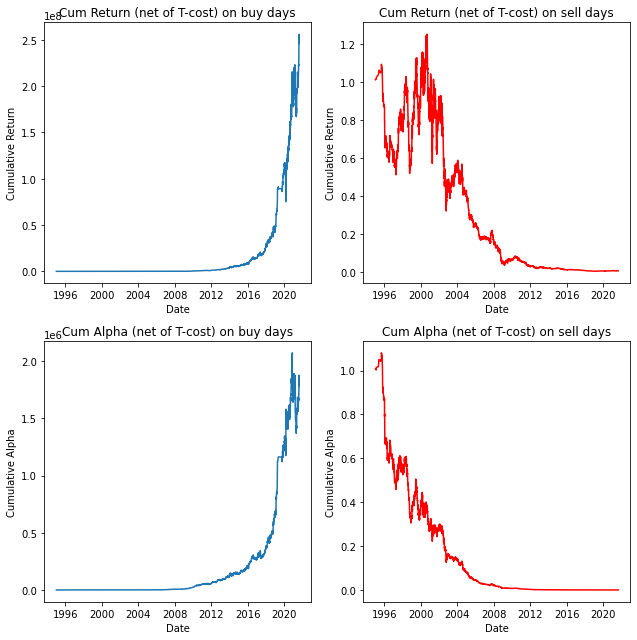

In [6]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)

# comments


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.943
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00720
Time:                        19:50:39   Log-Likelihood:                 17210.
No. Observations:                6481   AIC:                        -3.441e+04
Df Residuals:                    6474   BIC: 

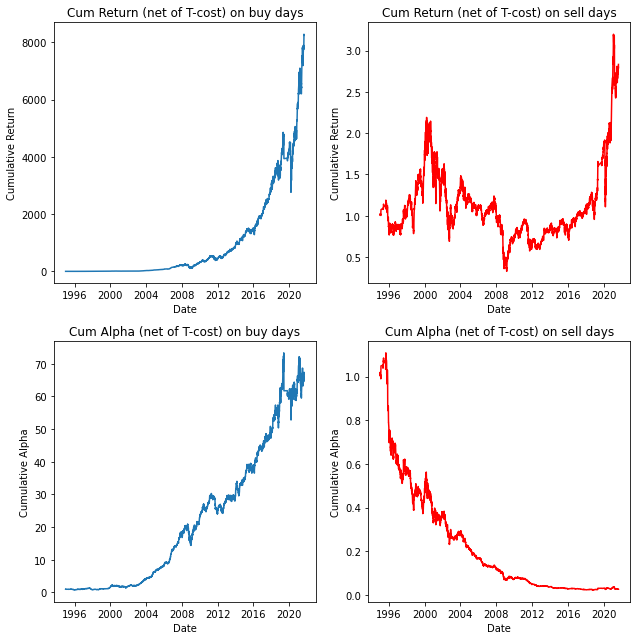

In [7]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.129
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000383
Time:                        19:51:05   Log-Likelihood:                 17649.
No. Observations:                6534   AIC:                        -3.528e+04
Df Residuals:                    6527   BIC: 

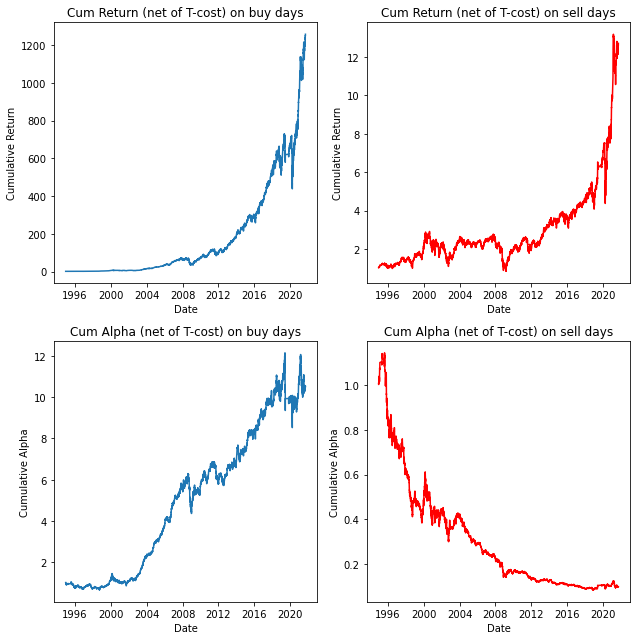

In [8]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.424
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000180
Time:                        19:51:32   Log-Likelihood:                 17804.
No. Observations:                6562   AIC:                        -3.559e+04
Df Residuals:                    6555   BIC: 

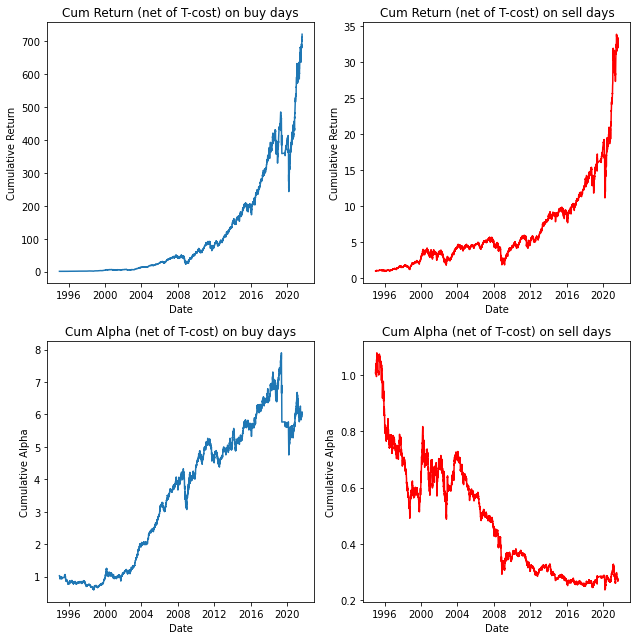

In [9]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.758
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.58e-05
Time:                        19:52:02   Log-Likelihood:                 17898.
No. Observations:                6578   AIC:                        -3.578e+04
Df Residuals:                    6571   BIC: 

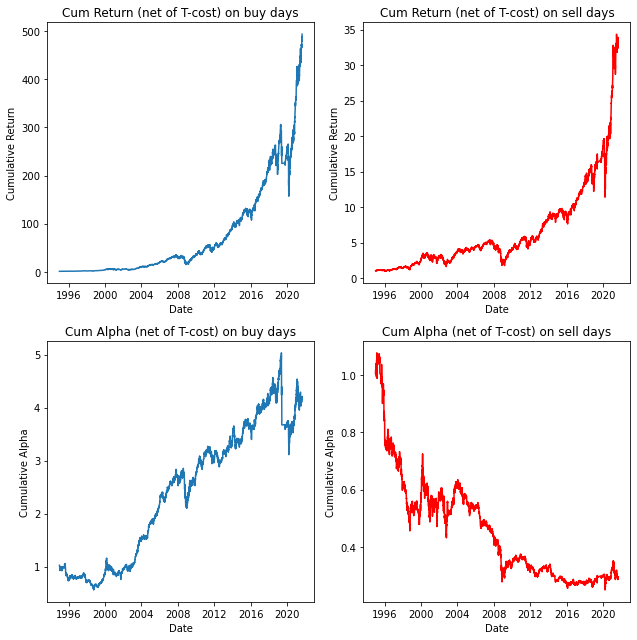

In [10]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using the epslowa1 estimate!

In [11]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa1'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epslowa1'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epslowa1'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  40743
Total number of Sells:  38408
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  12  problems for buying

There are  11  problems for selling
Total number of Buys:  40731
Total number of Sells:  38397

There are  64  problems for buying

There are  75  problems for selling
Total number of Buys:  476085
Total number of Sells:  373909

There are  58  problems for buying

There are  63  problems for selling
Total number of Buys:  377651
Total number of Sells:  299252

There are  50  problems for buying

There are  44  problems for selling
Total number of Buys:  271541
Total number of Sells:  218351

There are  29  problems for buying

There are  28  problems for selling
Total number of Buys:  155065
Total number of Sells:  128740

There are  4  problems for buying

There are  0  problems for selling
Total number of Buys:  40698
Total number of Sells:  38380



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.301
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00303
Time:                        19:54:10   Log-Likelihood:                 14471.
No. Observations:                6022   AIC:                        -2.893e+04
Df Residuals:                    6015   BIC: 

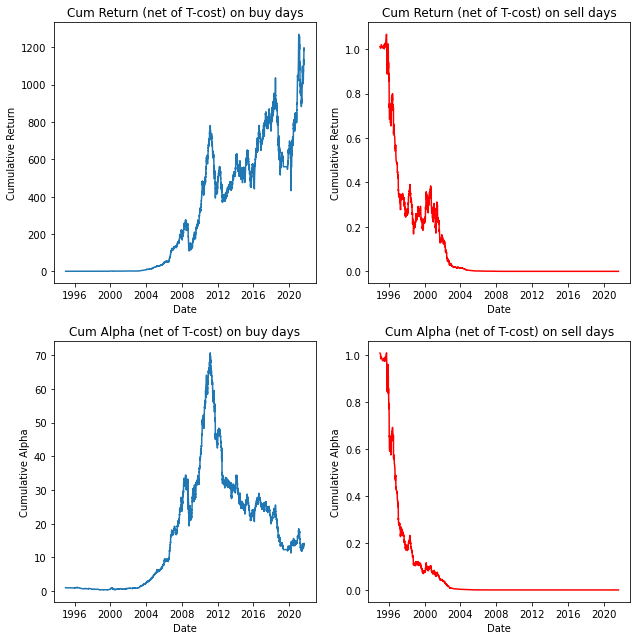

In [12]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.355
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0284
Time:                        19:54:29   Log-Likelihood:                 17461.
No. Observations:                6472   AIC:                        -3.491e+04
Df Residuals:                    6465   BIC: 

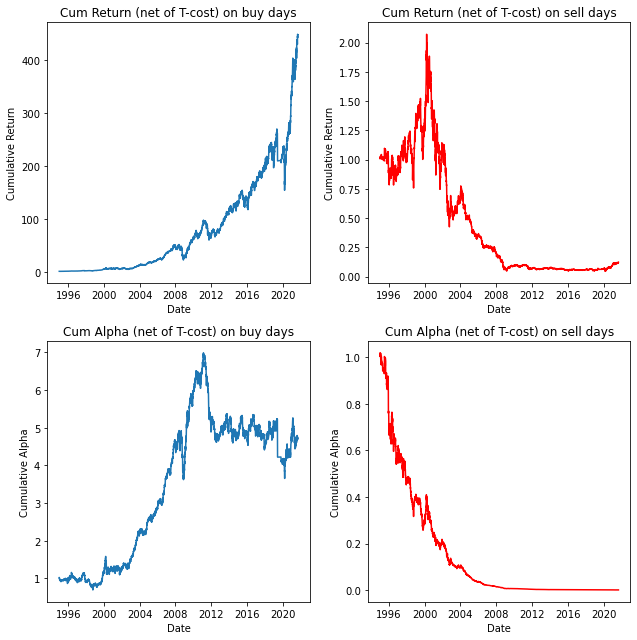

In [13]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.485
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00192
Time:                        19:54:53   Log-Likelihood:                 17906.
No. Observations:                6550   AIC:                        -3.580e+04
Df Residuals:                    6543   BIC: 

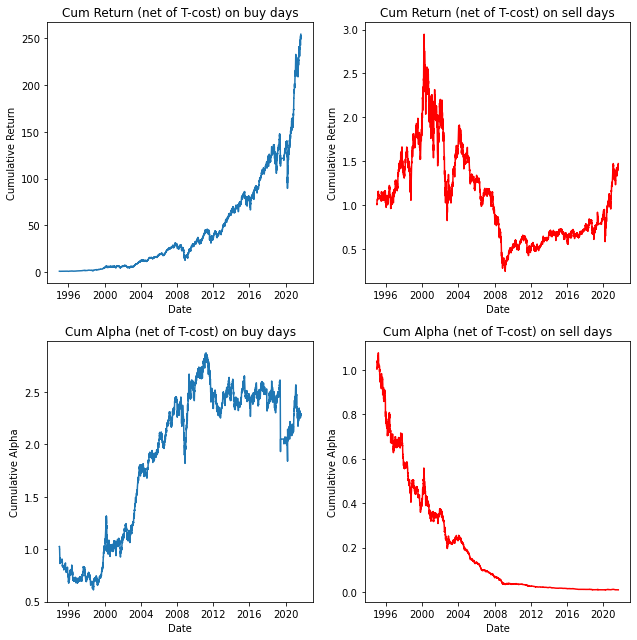

In [14]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.263
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000272
Time:                        19:55:21   Log-Likelihood:                 18038.
No. Observations:                6586   AIC:                        -3.606e+04
Df Residuals:                    6579   BIC: 

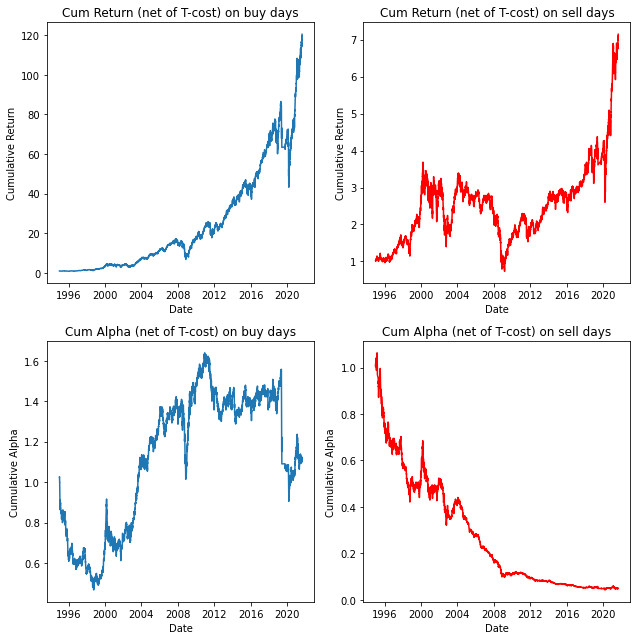

In [15]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.765
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.45e-05
Time:                        19:55:58   Log-Likelihood:                 18104.
No. Observations:                6603   AIC:                        -3.619e+04
Df Residuals:                    6596   BIC: 

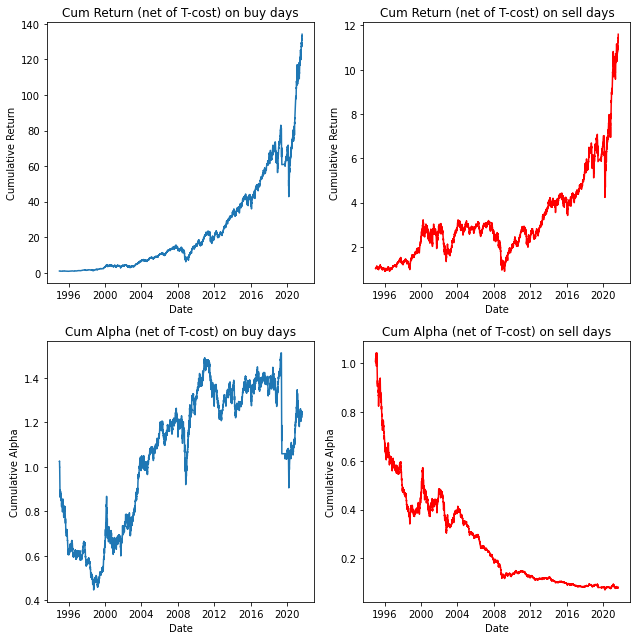

In [16]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using BOTH epshigha1 & epslowa1 estimate!

In [17]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa1'].notna()].reset_index(drop=True).copy()
data = data[data['epshigha1'].notna()].reset_index(drop=True).copy()

data['midpoint_eps_estimate'] = (data['epslowa1'] + data['epshigha1']) / 2

data = data[data['midpoint_eps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  53785
Total number of Sells:  55259
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  18  problems for buying

There are  15  problems for selling
Total number of Buys:  53767
Total number of Sells:  55244

There are  86  problems for buying

There are  109  problems for selling
Total number of Buys:  604568
Total number of Sells:  560852

There are  76  problems for buying

There are  95  problems for selling
Total number of Buys:  489356
Total number of Sells:  456987

There are  63  problems for buying

There are  74  problems for selling
Total number of Buys:  358516
Total number of Sells:  337816

There are  39  problems for buying

There are  43  problems for selling
Total number of Buys:  207111
Total number of Sells:  198077

There are  4  problems for buying

There are  0  problems for selling
Total number of Buys:  53731
Total number of Sells:  55218



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.038
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00574
Time:                        19:58:00   Log-Likelihood:                 15165.
No. Observations:                6187   AIC:                        -3.032e+04
Df Residuals:                    6180   BIC: 

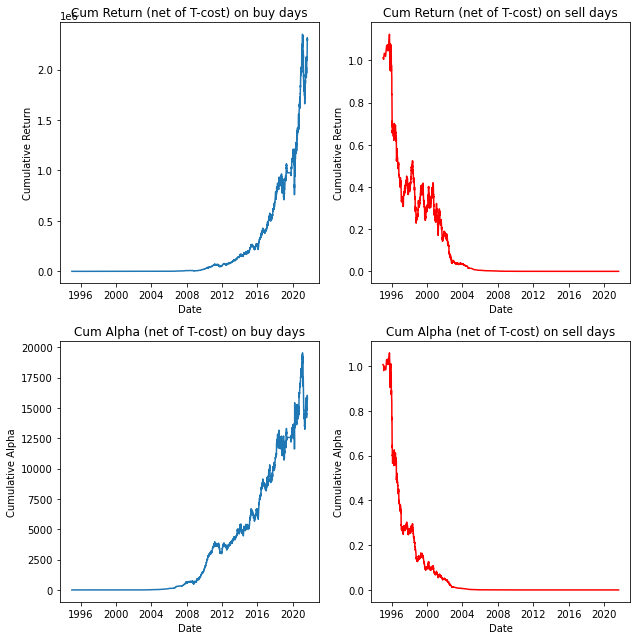

In [18]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.650
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0144
Time:                        19:58:23   Log-Likelihood:                 17615.
No. Observations:                6524   AIC:                        -3.522e+04
Df Residuals:                    6517   BIC: 

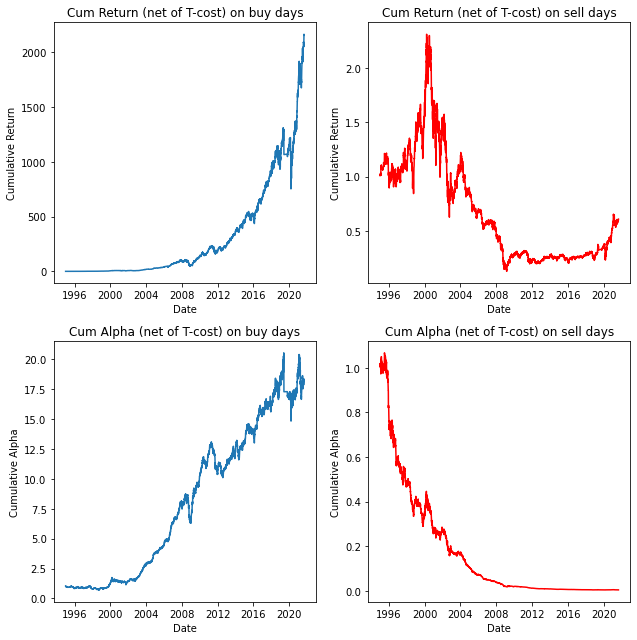

In [19]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.947
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000607
Time:                        19:58:51   Log-Likelihood:                 17928.
No. Observations:                6582   AIC:                        -3.584e+04
Df Residuals:                    6575   BIC: 

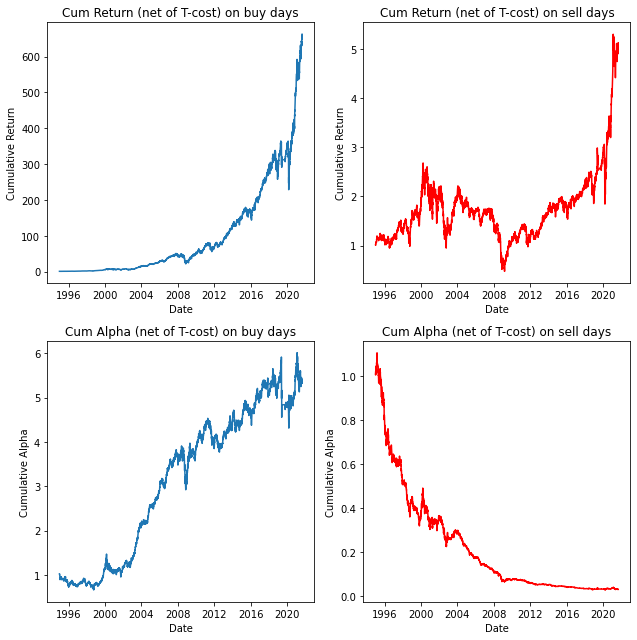

In [20]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.437
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000174
Time:                        19:59:38   Log-Likelihood:                 18032.
No. Observations:                6610   AIC:                        -3.605e+04
Df Residuals:                    6603   BIC: 

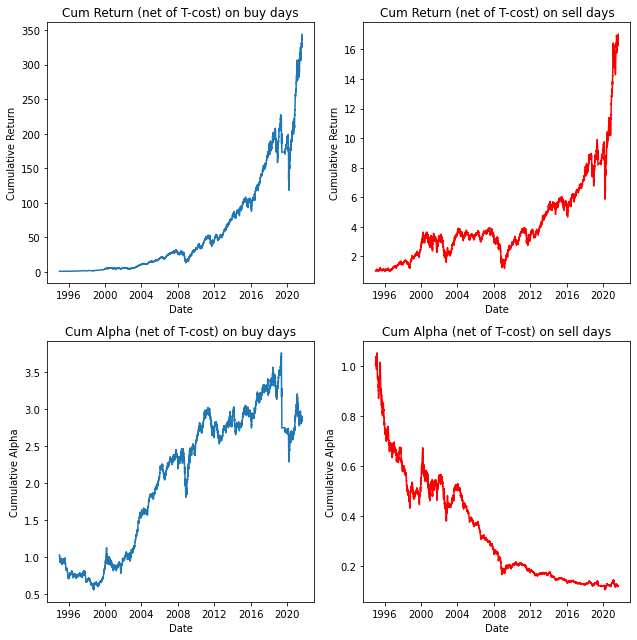

In [21]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.736
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           8.03e-05
Time:                        20:00:14   Log-Likelihood:                 18064.
No. Observations:                6617   AIC:                        -3.611e+04
Df Residuals:                    6610   BIC: 

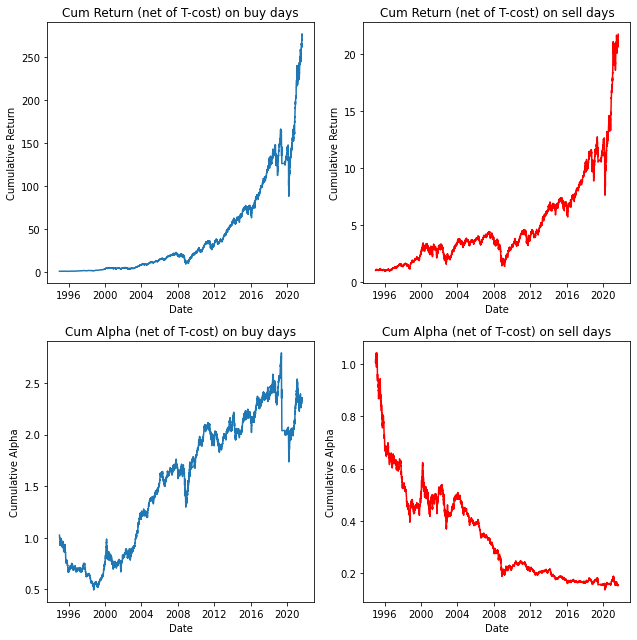

In [22]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleshigha1

In [23]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleshigha1'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleshigha1'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleshigha1'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  34413
Total number of Sells:  39351
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  17  problems for buying

There are  23  problems for selling
Total number of Buys:  34396
Total number of Sells:  39328

There are  91  problems for buying

There are  109  problems for selling
Total number of Buys:  415428
Total number of Sells:  381554

There are  73  problems for buying

There are  91  problems for selling
Total number of Buys:  329121
Total number of Sells:  303494

There are  55  problems for buying

There are  77  problems for selling
Total number of Buys:  235812
Total number of Sells:  219889

There are  33  problems for buying

There are  48  problems for selling
Total number of Buys:  133348
Total number of Sells:  128516

There are  3  problems for buying

There are  1  problems for selling
Total number of Buys:  34369
Total number of Sells:  39312



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.233
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.286
Time:                        20:01:44   Log-Likelihood:                 12292.
No. Observations:                5589   AIC:                        -2.457e+04
Df Residuals:                    5582   BIC: 

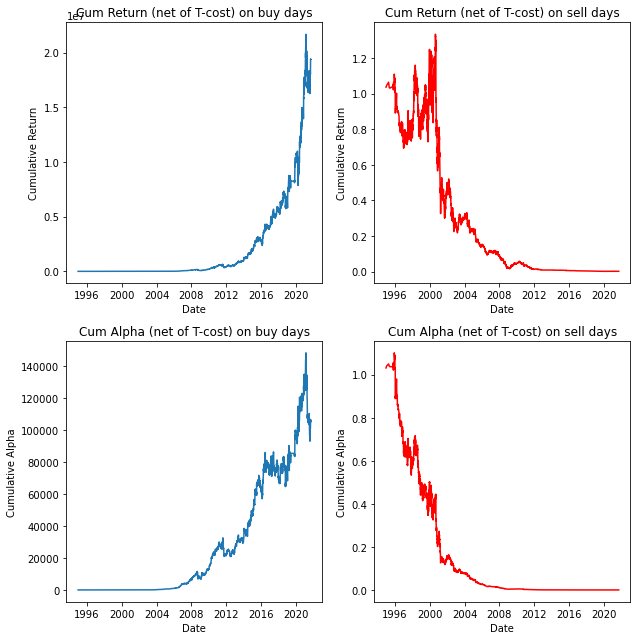

In [24]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.336
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000225
Time:                        20:02:05   Log-Likelihood:                 16303.
No. Observations:                6367   AIC:                        -3.259e+04
Df Residuals:                    6360   BIC: 

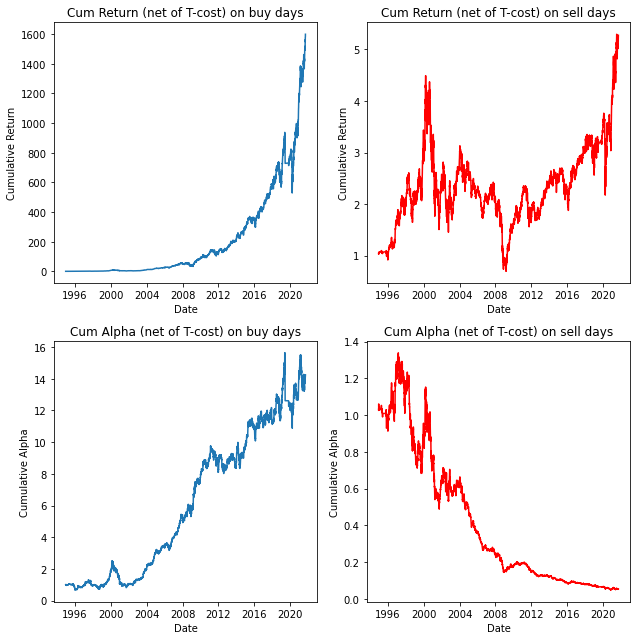

In [25]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.055
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000461
Time:                        20:02:28   Log-Likelihood:                 17193.
No. Observations:                6495   AIC:                        -3.437e+04
Df Residuals:                    6488   BIC: 

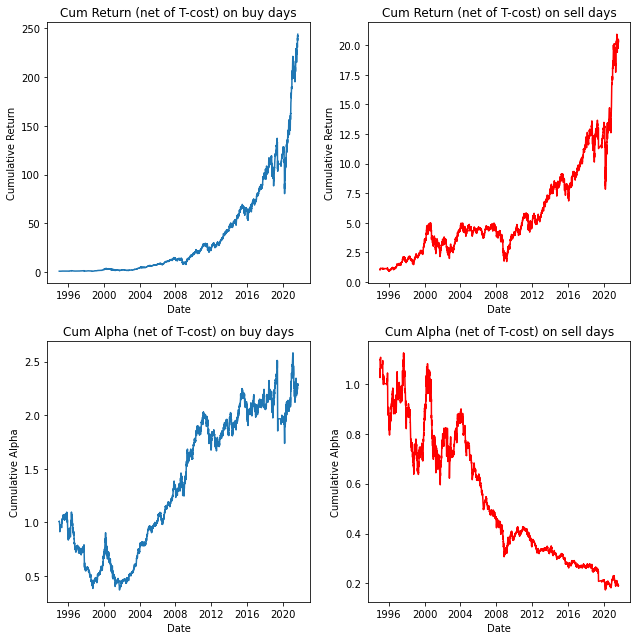

In [26]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.871
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000734
Time:                        20:02:58   Log-Likelihood:                 17465.
No. Observations:                6538   AIC:                        -3.492e+04
Df Residuals:                    6531   BIC: 

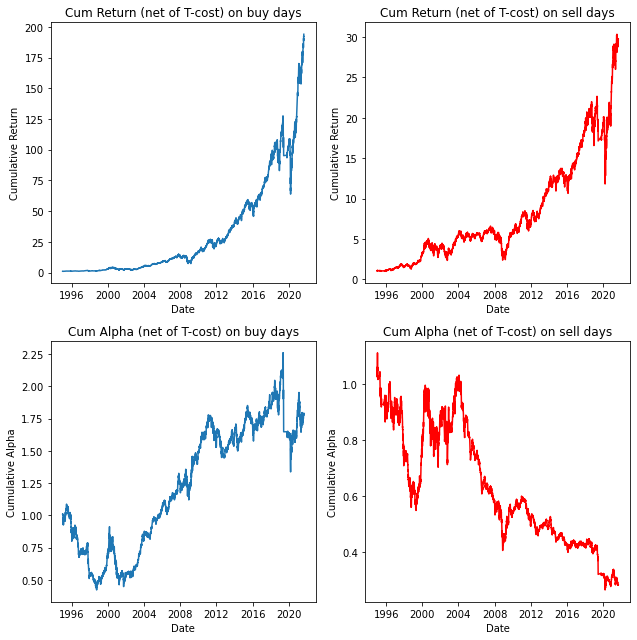

In [27]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.105
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000407
Time:                        20:03:30   Log-Likelihood:                 17621.
No. Observations:                6563   AIC:                        -3.523e+04
Df Residuals:                    6556   BIC: 

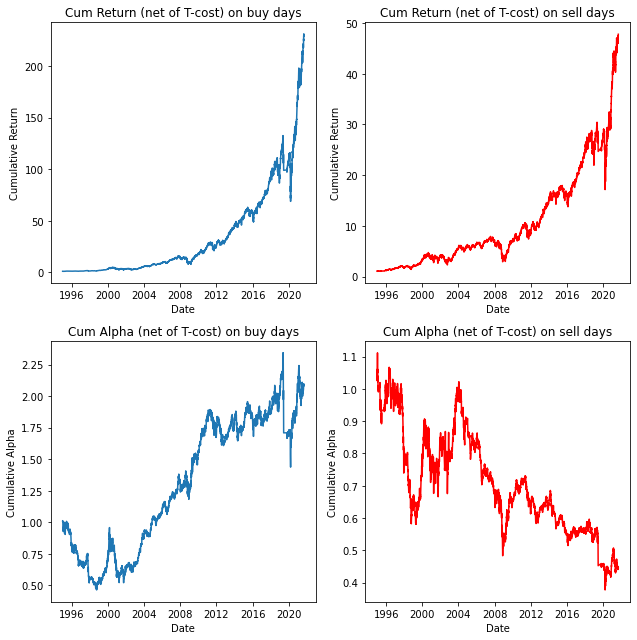

In [28]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleslowa1

In [29]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa1'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleslowa1'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleslowa1'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  37140
Total number of Sells:  37021
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  15  problems for buying

There are  22  problems for selling
Total number of Buys:  37125
Total number of Sells:  36999

There are  91  problems for buying

There are  110  problems for selling
Total number of Buys:  453639
Total number of Sells:  335848

There are  79  problems for buying

There are  93  problems for selling
Total number of Buys:  359105
Total number of Sells:  268911

There are  55  problems for buying

There are  77  problems for selling
Total number of Buys:  257278
Total number of Sells:  196499

There are  35  problems for buying

There are  56  problems for selling
Total number of Buys:  145279
Total number of Sells:  116653

There are  3  problems for buying

There are  0  problems for selling
Total number of Buys:  37090
Total number of Sells:  36981



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8229
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.552
Time:                        20:04:55   Log-Likelihood:                 12313.
No. Observations:                5619   AIC:                        -2.461e+04
Df Residuals:                    5612   BIC: 

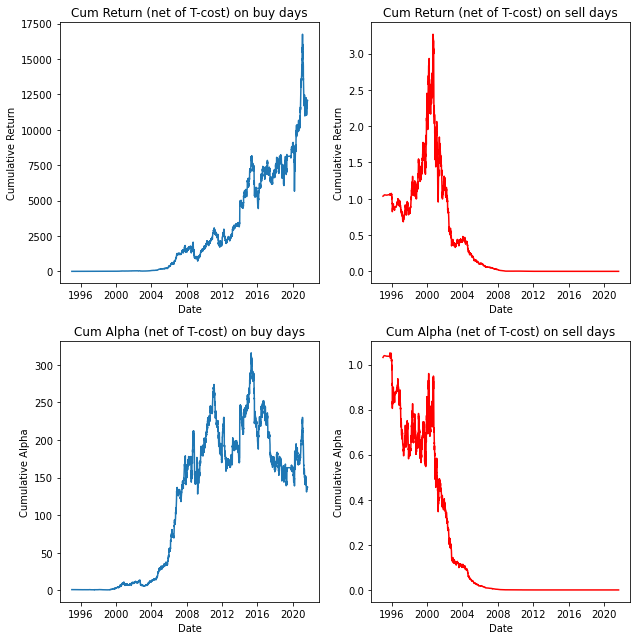

In [30]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.082
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00515
Time:                        20:05:15   Log-Likelihood:                 16451.
No. Observations:                6355   AIC:                        -3.289e+04
Df Residuals:                    6348   BIC: 

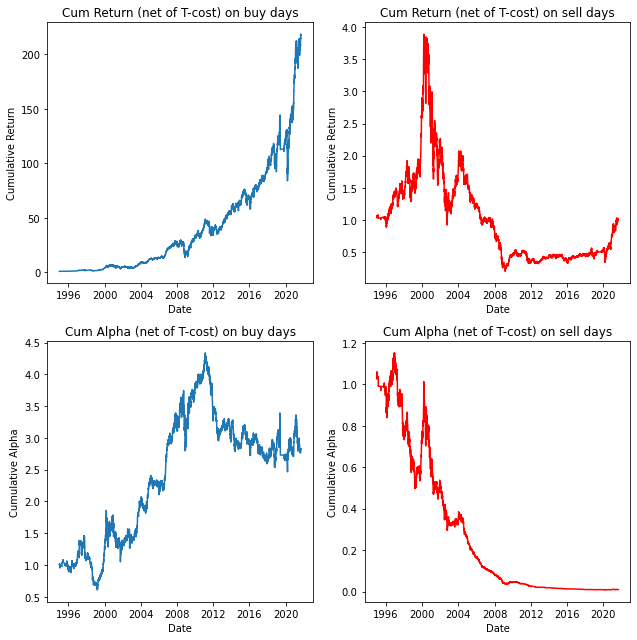

In [31]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.846
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000782
Time:                        20:05:42   Log-Likelihood:                 17191.
No. Observations:                6496   AIC:                        -3.437e+04
Df Residuals:                    6489   BIC: 

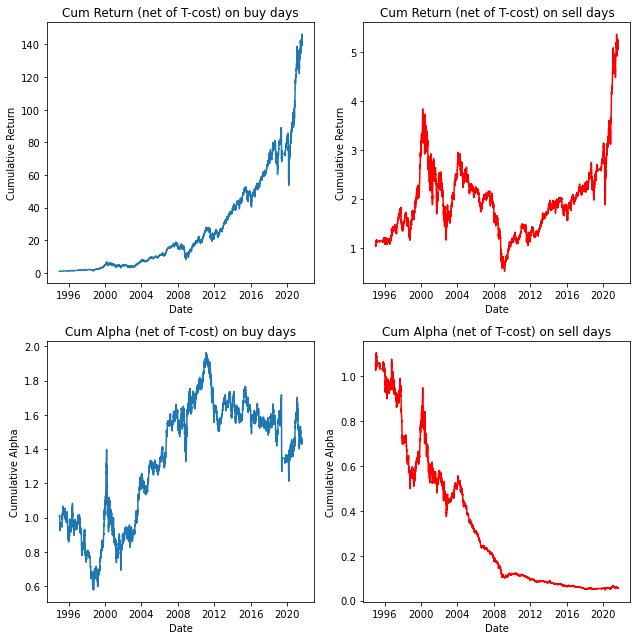

In [32]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.097
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000414
Time:                        20:06:11   Log-Likelihood:                 17472.
No. Observations:                6541   AIC:                        -3.493e+04
Df Residuals:                    6534   BIC: 

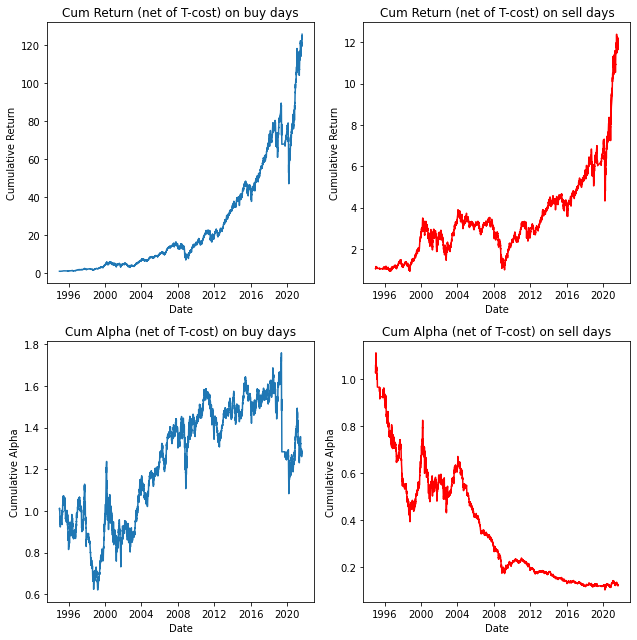

In [33]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.166
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000348
Time:                        20:06:43   Log-Likelihood:                 17619.
No. Observations:                6563   AIC:                        -3.522e+04
Df Residuals:                    6556   BIC: 

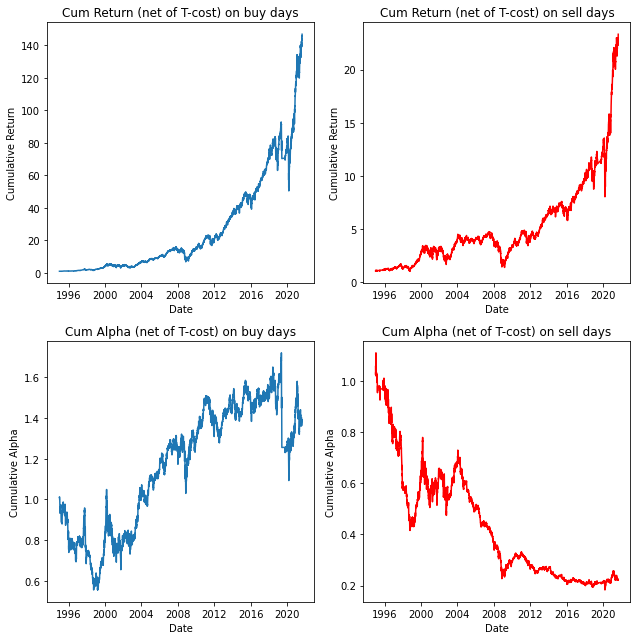

In [34]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH saleshigha1 & saleslowa1

In [35]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa1'].notna()].reset_index(drop=True).copy()
data = data[data['saleshigha1'].notna()].reset_index(drop=True).copy()

data['midpoint_sales_estimate'] = (data['saleslowa1'] + data['saleshigha1']) / 2

data = data[data['midpoint_sales_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  48547
Total number of Sells:  50856
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  22  problems for buying

There are  26  problems for selling
Total number of Buys:  48525
Total number of Sells:  50830

There are  126  problems for buying

There are  157  problems for selling
Total number of Buys:  561253
Total number of Sells:  496426

There are  107  problems for buying

There are  133  problems for selling
Total number of Buys:  453072
Total number of Sells:  402788

There are  80  problems for buying

There are  112  problems for selling
Total number of Buys:  330819
Total number of Sells:  297167

There are  51  problems for buying

There are  74  problems for selling
Total number of Buys:  189669
Total number of Sells:  174861

There are  3  problems for buying

There are  1  problems for selling
Total number of Buys:  48485
Total number of Sells:  50806



There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.712
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.114
Time:                        20:08:22   Log-Likelihood:                 13215.
No. Observations:                5861   AIC:                        -2.642e+04
Df Residuals:                    5854   BIC: 

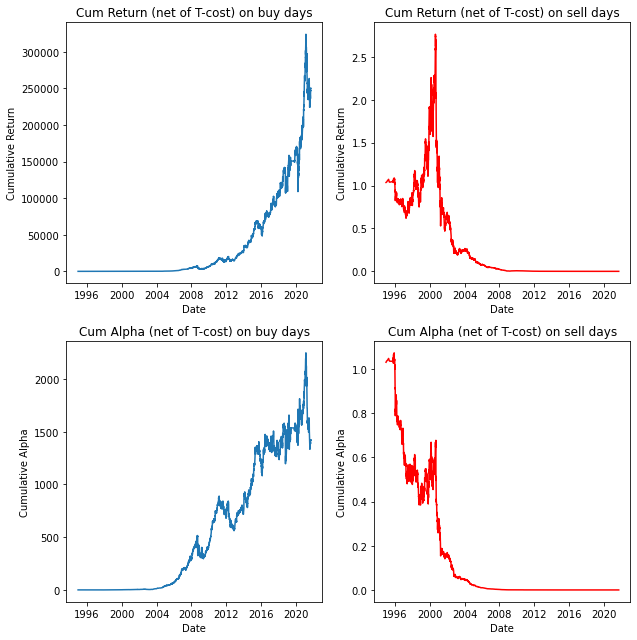

In [36]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.564
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00158
Time:                        20:08:44   Log-Likelihood:                 16710.
No. Observations:                6429   AIC:                        -3.341e+04
Df Residuals:                    6422   BIC: 

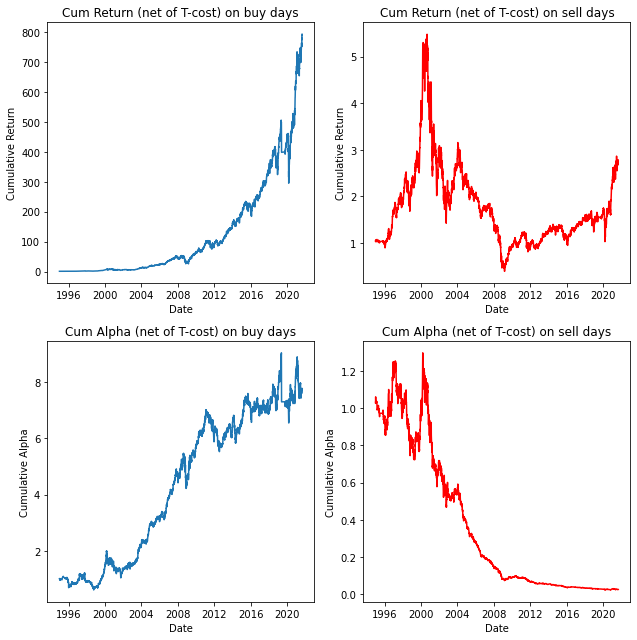

In [37]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.788
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000905
Time:                        20:09:17   Log-Likelihood:                 17306.
No. Observations:                6518   AIC:                        -3.460e+04
Df Residuals:                    6511   BIC: 

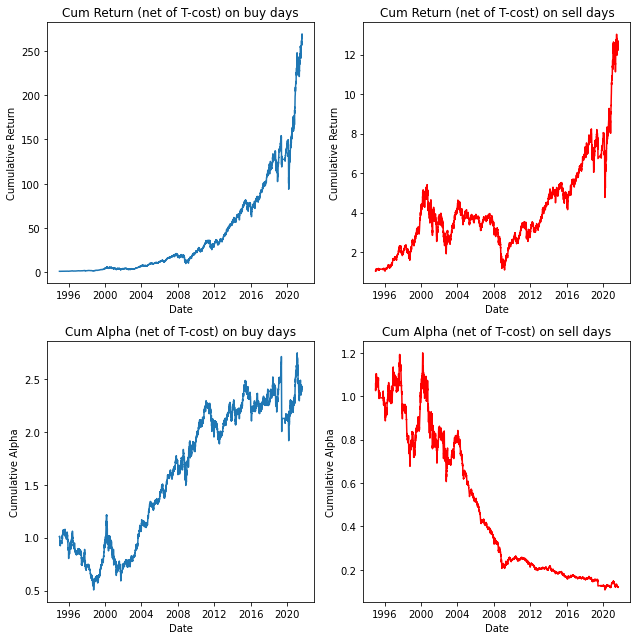

In [38]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.858
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000759
Time:                        20:09:46   Log-Likelihood:                 17509.
No. Observations:                6552   AIC:                        -3.500e+04
Df Residuals:                    6545   BIC: 

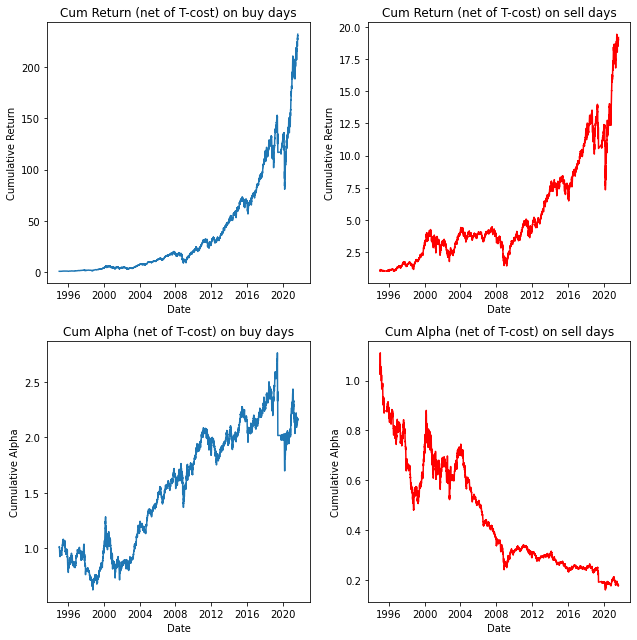

In [39]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.185
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000332
Time:                        20:10:17   Log-Likelihood:                 17649.
No. Observations:                6574   AIC:                        -3.528e+04
Df Residuals:                    6567   BIC: 

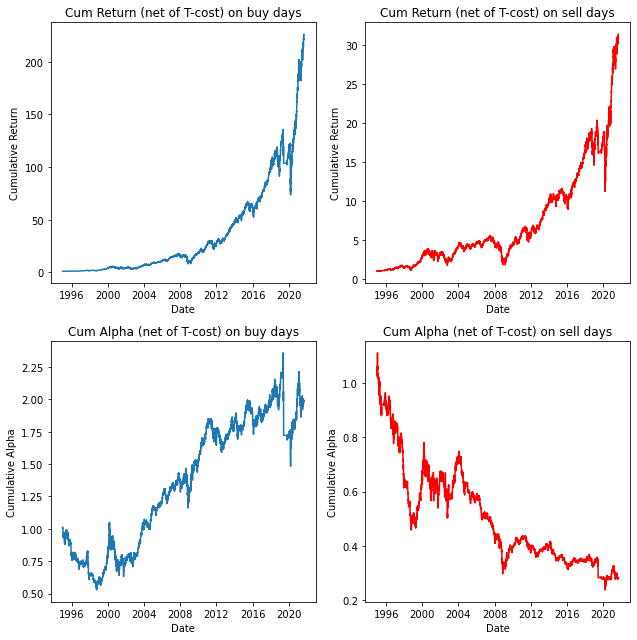

In [40]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpshigha1

In [41]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha1'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpshigha1'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpshigha1'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  26788
Total number of Sells:  31703
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  27  problems for buying

There are  24  problems for selling
Total number of Buys:  26761
Total number of Sells:  31679

There are  111  problems for buying

There are  127  problems for selling
Total number of Buys:  320273
Total number of Sells:  286235

There are  90  problems for buying

There are  109  problems for selling
Total number of Buys:  252261
Total number of Sells:  227294

There are  69  problems for buying

There are  86  problems for selling
Total number of Buys:  179941
Total number of Sells:  164732

There are  38  problems for buying

There are  51  problems for selling
Total number of Buys:  102052
Total number of Sells:  97516

There are  2  problems for buying

There are  2  problems for selling
Total number of Buys:  26741
Total number of Sells:  31668



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.379
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.219
Time:                        20:11:34   Log-Likelihood:                 12088.
No. Observations:                5284   AIC:                        -2.416e+04
Df Residuals:                    5277   BIC: 

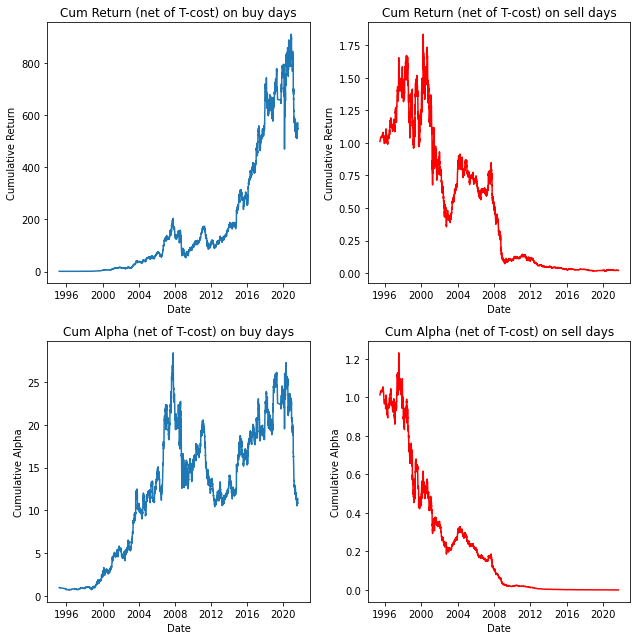

In [42]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.082
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000431
Time:                        20:11:54   Log-Likelihood:                 16646.
No. Observations:                6299   AIC:                        -3.328e+04
Df Residuals:                    6292   BIC: 

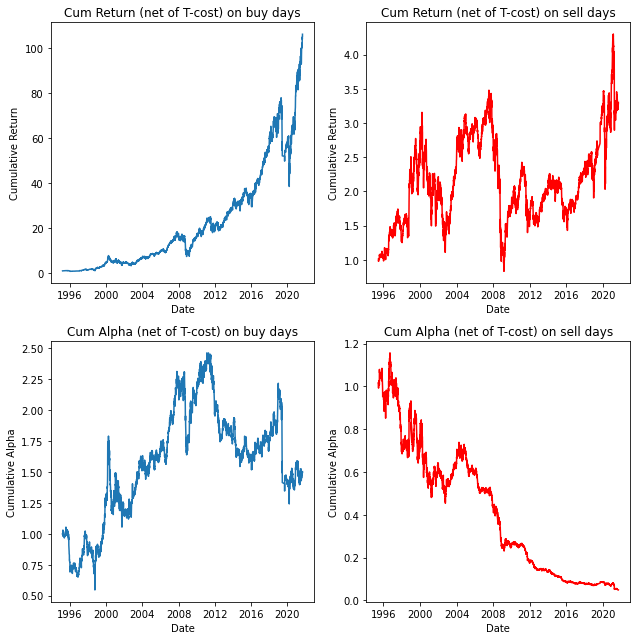

In [43]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.808
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000862
Time:                        20:12:15   Log-Likelihood:                 17490.
No. Observations:                6474   AIC:                        -3.497e+04
Df Residuals:                    6467   BIC: 

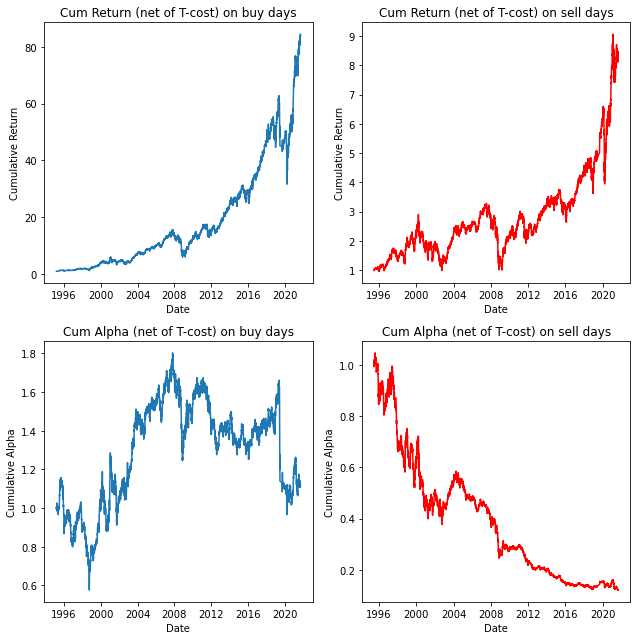

In [44]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.012
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000515
Time:                        20:12:36   Log-Likelihood:                 17870.
No. Observations:                6545   AIC:                        -3.573e+04
Df Residuals:                    6538   BIC: 

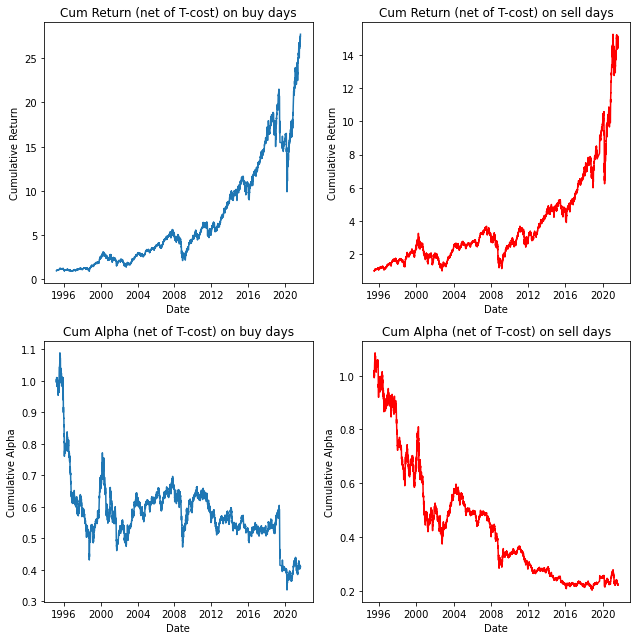

In [45]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.132
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000379
Time:                        20:13:09   Log-Likelihood:                 18030.
No. Observations:                6573   AIC:                        -3.605e+04
Df Residuals:                    6566   BIC: 

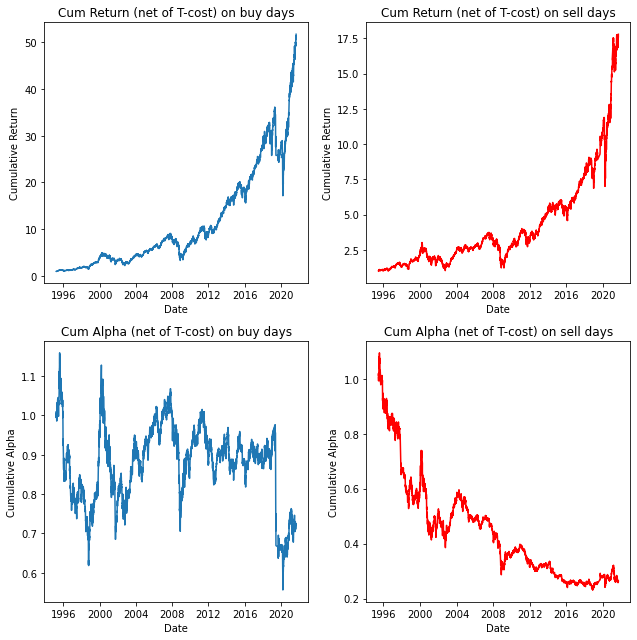

In [46]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpslowa1

In [47]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpslowa1'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpslowa1'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpslowa1'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  26646
Total number of Sells:  31463
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  32  problems for buying

There are  17  problems for selling
Total number of Buys:  26614
Total number of Sells:  31446

There are  125  problems for buying

There are  112  problems for selling
Total number of Buys:  317814
Total number of Sells:  286637

There are  99  problems for buying

There are  94  problems for selling
Total number of Buys:  250127
Total number of Sells:  227975

There are  75  problems for buying

There are  76  problems for selling
Total number of Buys:  178324
Total number of Sells:  165415

There are  50  problems for buying

There are  46  problems for selling
Total number of Buys:  101073
Total number of Sells:  97848

There are  2  problems for buying

There are  2  problems for selling
Total number of Buys:  26597
Total number of Sells:  31436



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.410
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0250
Time:                        20:14:42   Log-Likelihood:                 12341.
No. Observations:                5325   AIC:                        -2.467e+04
Df Residuals:                    5318   BIC: 

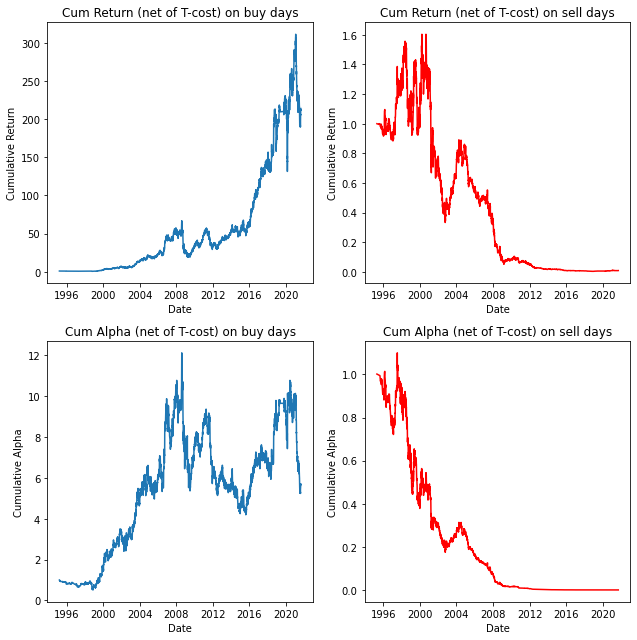

In [48]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.792
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0103
Time:                        20:15:01   Log-Likelihood:                 16656.
No. Observations:                6291   AIC:                        -3.330e+04
Df Residuals:                    6284   BIC: 

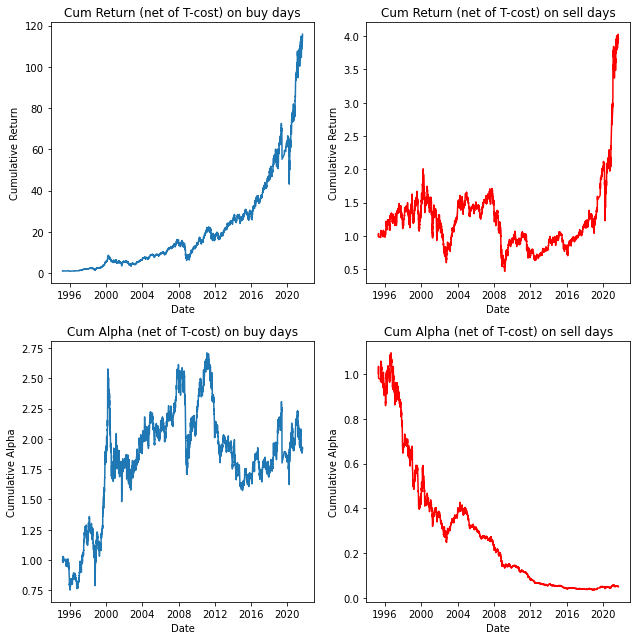

In [49]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.331
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00282
Time:                        20:15:22   Log-Likelihood:                 17420.
No. Observations:                6442   AIC:                        -3.483e+04
Df Residuals:                    6435   BIC: 

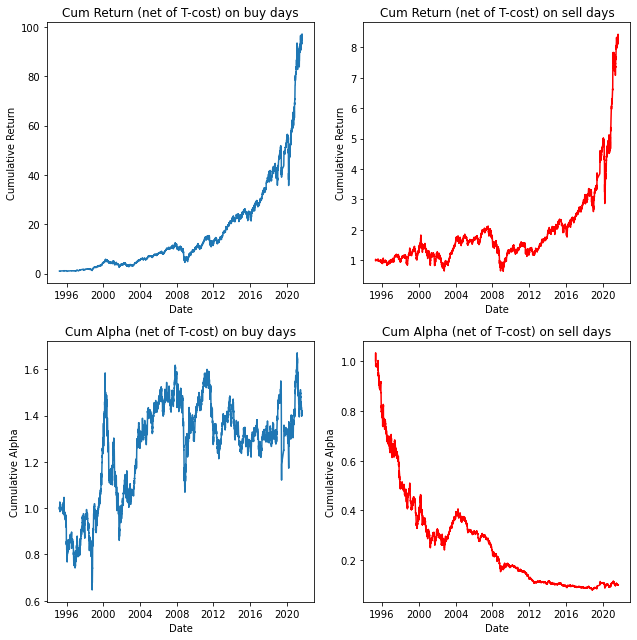

In [50]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.334
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00279
Time:                        20:15:44   Log-Likelihood:                 17758.
No. Observations:                6508   AIC:                        -3.550e+04
Df Residuals:                    6501   BIC: 

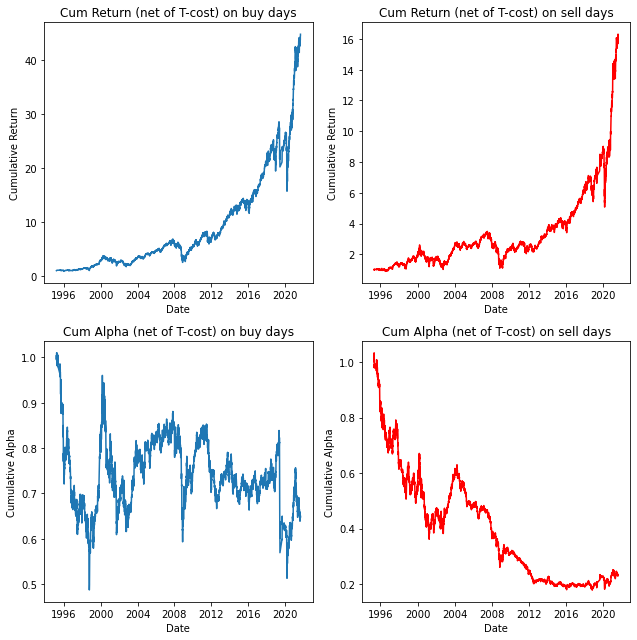

In [51]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.510
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00181
Time:                        20:16:11   Log-Likelihood:                 17940.
No. Observations:                6544   AIC:                        -3.587e+04
Df Residuals:                    6537   BIC: 

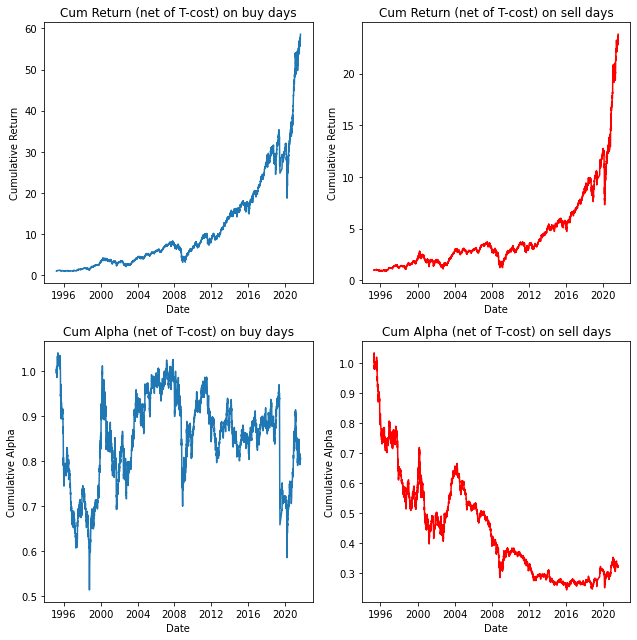

In [52]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH cfpshigha1 & cfpslowa1

In [53]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha1'].notna()].reset_index(drop=True).copy()
data = data[data['cfpslowa1'].notna()].reset_index(drop=True).copy()

data['midpoint_cfps_estimate'] = (data['cfpslowa1'] + data['cfpshigha1']) / 2

data = data[data['midpoint_cfps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  33083
Total number of Sells:  38722
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  35  problems for buying

There are  24  problems for selling
Total number of Buys:  33048
Total number of Sells:  38698

There are  144  problems for buying

There are  151  problems for selling
Total number of Buys:  391439
Total number of Sells:  368658

There are  116  problems for buying

There are  130  problems for selling
Total number of Buys:  311713
Total number of Sells:  296197

There are  89  problems for buying

There are  103  problems for selling
Total number of Buys:  224492
Total number of Sells:  216367

There are  57  problems for buying

There are  61  problems for selling
Total number of Buys:  127628
Total number of Sells:  127034

There are  2  problems for buying

There are  2  problems for selling
Total number of Buys:  33027
Total number of Sells:  38683



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.904
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00790
Time:                        20:17:31   Log-Likelihood:                 13051.
No. Observations:                5551   AIC:                        -2.609e+04
Df Residuals:                    5544   BIC: 

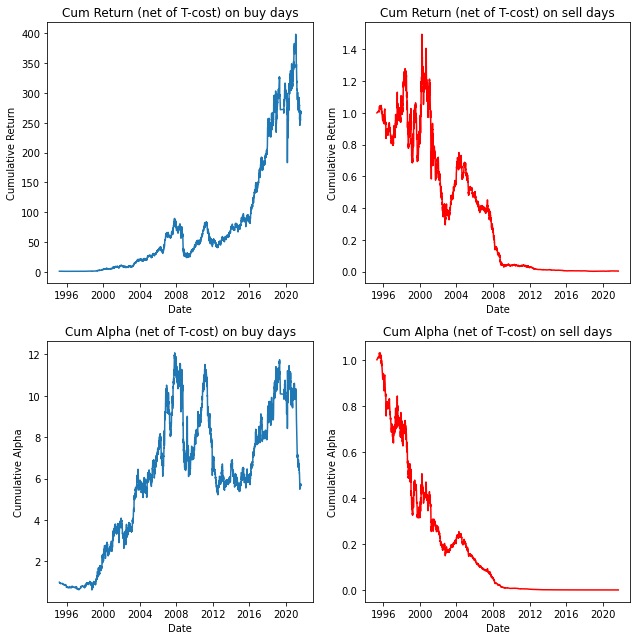

In [54]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.869
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000738
Time:                        20:17:48   Log-Likelihood:                 16873.
No. Observations:                6349   AIC:                        -3.373e+04
Df Residuals:                    6342   BIC: 

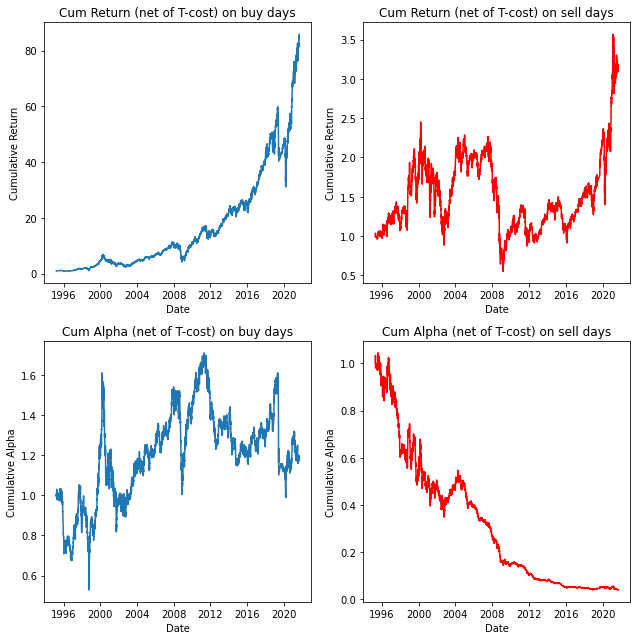

In [55]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.706
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00111
Time:                        20:18:11   Log-Likelihood:                 17640.
No. Observations:                6493   AIC:                        -3.527e+04
Df Residuals:                    6486   BIC: 

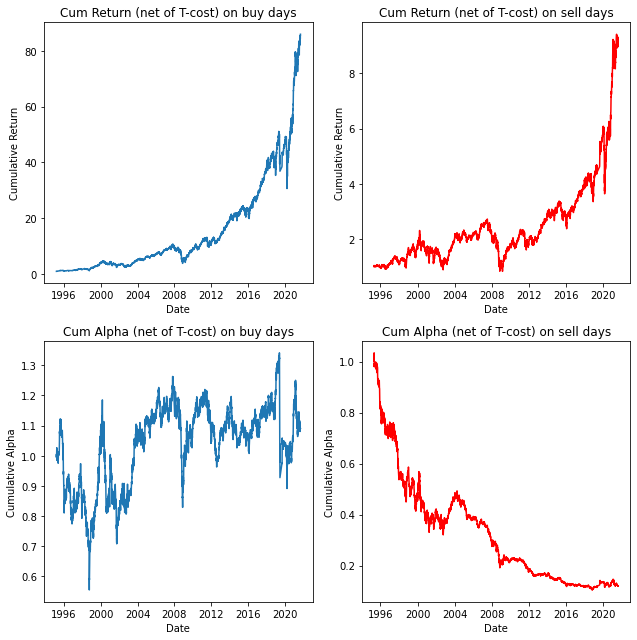

In [56]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.911
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000664
Time:                        20:18:35   Log-Likelihood:                 17908.
No. Observations:                6551   AIC:                        -3.580e+04
Df Residuals:                    6544   BIC: 

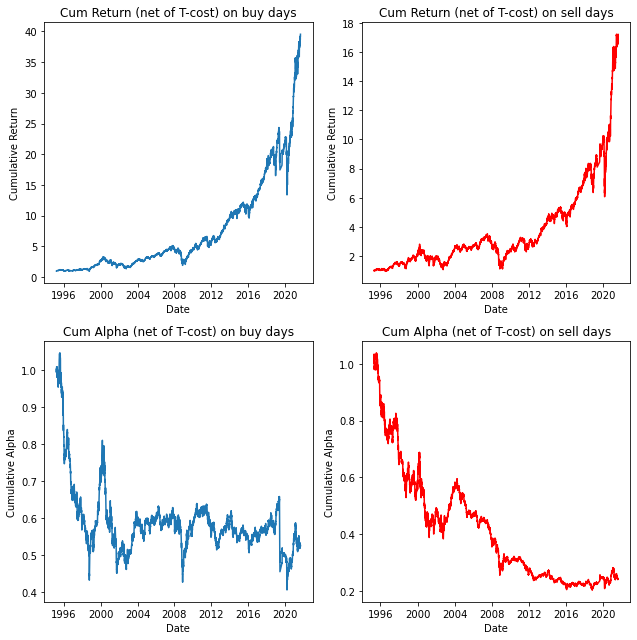

In [57]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.961
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000585
Time:                        20:19:03   Log-Likelihood:                 18066.
No. Observations:                6581   AIC:                        -3.612e+04
Df Residuals:                    6574   BIC: 

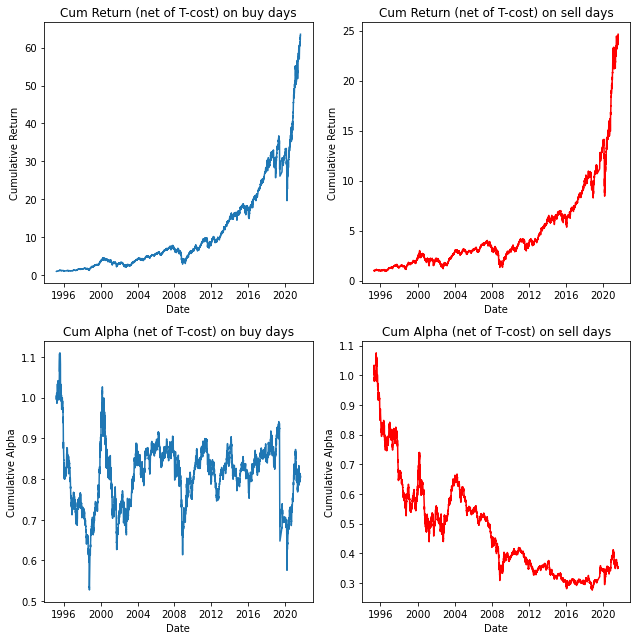

In [58]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)